In [1]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [17]:
#Implementing Support Vector Machine with Linear Kernel
class CustomLinearSVM():

  def __init__(self,learning_rate,n_epochs,lambda_value):
    self.rate = learning_rate
    self.iter = n_epochs
    self.lambda_val = lambda_value
    self.weights = None
    self.bias = None

  def train(self, X, Y):

    #Determine number of data points and features in dataset
    self.n, self.features = X.shape

    self.weights = np.zeros(self.features)
    self.bias = 0

    #Modifying the output values
    y_modified = np.where(Y <= 0, -1, 1)

    for _ in range(self.iter):
      self.optimization(X, Y)

  def optimization(self, X, Y):

    for i, x in enumerate(X):
      #Defining the SVM constraint as an optimization problem 
      hyperplane_constraint = Y[i] * (np.dot (x , self.weights) - self.bias) 

      #Updating the parameters to minimize w and hence maximize the margin
      if hyperplane_constraint >= 1:
        self.weights = self.weights - self.rate * (2 * self.weights * self.lambda_val)
      else:
        self.weights = self.weights - self.rate * (2 * self.weights * self.lambda_val - np.dot(x, Y[i]))
        self.bias = self.bias - self.rate * Y[i]

  def predict(self,X):
    #Predicting the ouput using the learned parameters
    y_out = np.dot(X, self.weights) - self.bias
    return np.sign(y_out)

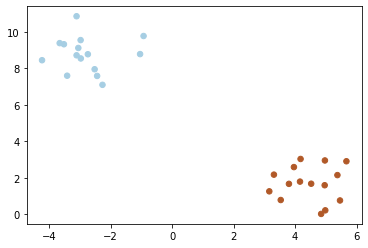

In [27]:
#Generating Gaussian blobs with 30 samples and 2 centres
X, Y = make_blobs(n_samples=30, centers=2, random_state=42)

# Training the model 
#Hyperparameters: Learning rate = 0.01; Number of epochs = 1000, Lambda = 0.01
model = CustomLinearSVM(0.001,1000,0.01)
model.train(X, Y)

#Plotting the generated blobs
plt.scatter(X[:, 0], X[:, 1], c=Y, s=30, cmap=plt.cm.Paired)


In [28]:
print (model.weights)


[0.24608411 0.09385757]


In [29]:
print (model.bias)

-0.10700000000000008
